# Test hoje 10 m
Barbara Rodič, 1. letnik FT (2. stopnja)

## Potrebne knjižnice in funkcije
Vsebino spodnje celice je potrebno izvesti le enkrat. Ker ves proces poteka v spletnem brskalniku vaše naprave, lahko ta korak traja nekaj časa.

In [12]:
import numpy as np
import pandas as pd
from scipy import signal
import sys,os
import matplotlib.pyplot as plt
%pip install -q ipympl
%matplotlib widget

from mihaf.smoothness import log_dimensionless_jerk2 as ldlj

def Raw_Filtered_Plot(t,y,fy,ldj,ldjf,measurement='Measurement',xlabel='x',ylabel='y',legend=True,filter=True):
    '''Plot Raw and Filtered data over time'''
    fig = plt.figure()
    plt.plot(t,y,label=f'Neobdelani podatki: LDJ = {ldj:.0f}')
    if filter: plt.plot(t,fy,label=f'Filtrirani podatki: LDJ = {ldjf:.0f}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(measurement)
    if legend: plt.legend(loc='upper right')
    plt.show()

def AnalyzeSignal(d,ydataNo,order=8,CNr=0.1,Start=0,Interval=0,plot=True,legend=True,filter=True,title='Measurement'):
    '''Get Raw and Filtered data. Using Lowpass Butterworth filter with order=order and Cnr=f_crit/f_Nyquist'''
    
    # Get sampling frequency over the whole interval (cutting off cut first and last points)
    cut = 0
    t, y = [d.iloc[:,col][cut:-(cut+1)] for col in (0,ydataNo)]
    dtlist = t.diff()[1:]
    fslist = 1/dtlist # Sampling frequency
    fs, sfs = np.average(fslist),np.std(fslist)
    sampling = f', Vzorčenje: $\\nu$ = {fs:.0f} Hz, $\sigma_\\nu =$ {sfs:.0f} Hz'
    
    # Filter and plot interval given in seconds
    if Interval == 0:
        Intervals = len(d)-int(Start*fs)
    else:
        Intervals = int(Interval*fs)
    Starts = int(Start*fs)
    t, y = [d.iloc[:,col][Starts:Starts+Intervals] for col in (0,ydataNo)]
    b, a = signal.butter(order, CNr * (0.5*fs), fs = fs) # Lowpass Butterworth filter with order=order and Cnr=f_crit/f_Nyquist
    fy = signal.filtfilt(b, a, y) # Apply filter forward and backward to a signal
    ldj, ldjf = (ldlj(yy,fs,data_type='accl') for yy in (y,fy)) # Log_Dimensionless_Jerk

    Raw_Filtered_Plot(t,y,fy,ldj,ldjf,
                      title,
                      xlabel=d.columns[0]+sampling,
                      ylabel=d.columns[ydataNo],
                      legend=legend,
                      filter=filter)
    return #t, y, fy, ldj,ldjf

## Analiza merskih podatkov aplikacije PhyPhox

In [13]:
measurements = ['data/hoja_jaz.csv','data/hoja_mami.csv','data/hoja_stara_mama.csv']
print(f'Berem datoteke: \"{measurements}\"')
jaz, mami, stmama = [pd.read_csv(measurement) for measurement in measurements]

Berem datoteke: "['data/hoja_jaz.csv', 'data/hoja_mami.csv', 'data/hoja_stara_mama.csv']"


In [14]:
jaz

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.022687,-0.335190,8.049301,-2.173935,8.344435
1,0.029859,-0.258575,7.934387,-0.871490,7.986292
2,0.034864,-0.296875,7.958328,0.215485,7.966778
3,0.040021,-0.426163,8.140289,1.216248,8.241674
4,0.044996,-0.603333,8.384491,2.063797,8.655805
...,...,...,...,...,...
1514,7.636646,-1.613693,6.320694,1.656784,6.730536
1515,7.641681,-1.580170,7.000641,2.772491,7.693674
1516,7.646717,-1.379059,8.011002,3.687073,8.925943
1517,7.651752,-1.130066,9.184158,4.103668,10.122544


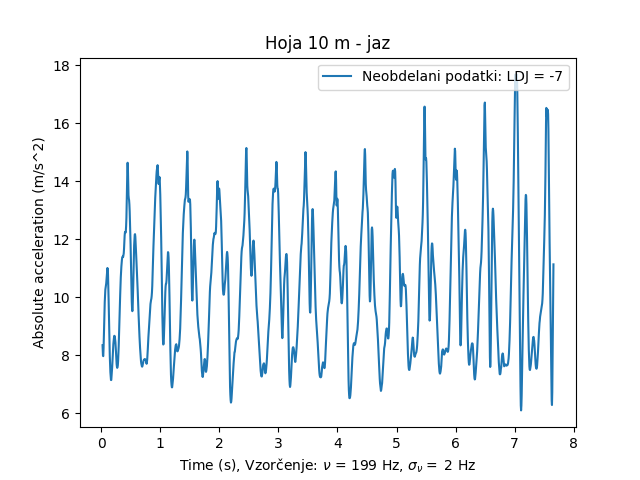

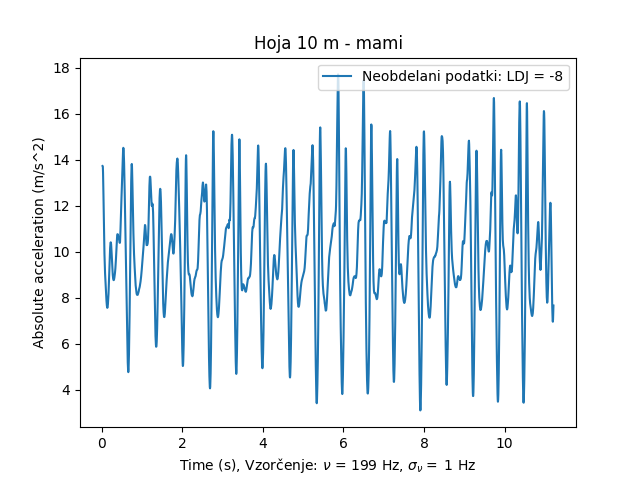

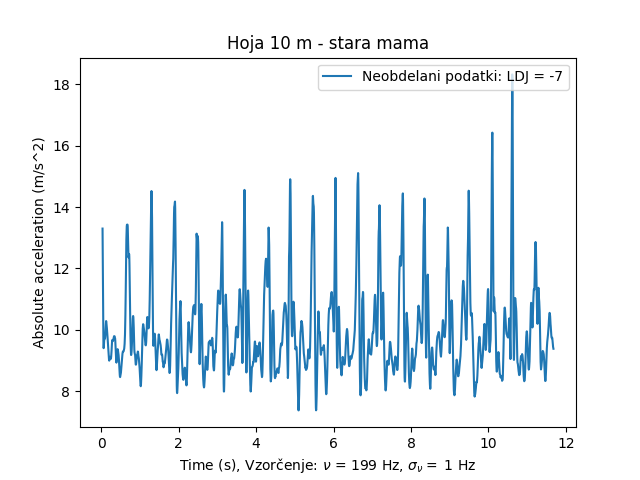

In [19]:
# Izberi podatke in interval izrisa
ydataNo = 4 # Zaporedna številka stolpca za analizo
Start = 0 # Začetek prikazanega intervala [s]
Interval = 0  # Dolžina prikazanega intervala [s]. Izberi 0 za celoten interval.

# Filtriranje signala z Butterworthovim filtrom (odreže visoke frekvence):
order = 5 # Red filtra. Lahko pustite kar 5.
CNr = 0.1 #  Poskusite 0.01 and 0.1. Izbira je možna v intervalu (0,1). CNr predstavlja f_crit/f_Nyquist filtra. 

AnalyzeSignal(jaz,ydataNo,order,CNr, Start,Interval,legend=True,filter=False,title='Hoja 10 m - jaz')
AnalyzeSignal(mami,ydataNo,order,CNr, Start,Interval,legend=True,filter=False,title='Hoja 10 m - mami')
AnalyzeSignal(stmama,ydataNo,order,CNr, Start,Interval,legend=True,filter=False,title='Hoja 10 m - stara mama')